In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers, models
import os
import matplotlib.pyplot as plt

In [2]:
train_dir = '../dataset/train'
validation_dir = '../dataset/validation'
test_dir = '../dataset/test'

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 4363 images belonging to 3 classes.
Found 545 images belonging to 3 classes.
Found 547 images belonging to 3 classes.


In [5]:
num_classes = 3

In [6]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

In [7]:
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),  # Input shape for 150x150 RGB images
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,843,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,853,603 (7.07 MB)

 Trainable params: 1,853,603 (7.07 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
import datetime

In [9]:
epochs = 10

In [10]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
)

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 
model_filename = f'./output/mango_classifier_{current_time}.keras'

model.save(model_filename)

print(f'Model saved to {model_filename}')

Epoch 1/10


d:\Workspace\MangoClassify\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


137/137 ━━━━━━━━━━━━━━━━━━━━ 92s 628ms/step - accuracy: 0.6421 - loss: 0.8064 - val_accuracy: 0.8312 - val_loss: 0.4276
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 56s 390ms/step - accuracy: 0.8677 - loss: 0.3693 - val_accuracy: 0.8771 - val_loss: 0.2772
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 55s 383ms/step - accuracy: 0.9444 - loss: 0.1910 - val_accuracy: 0.9761 - val_loss: 0.0968
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 55s 386ms/step - accuracy: 0.9801 - loss: 0.1039 - val_accuracy: 0.9945 - val_loss: 0.0570
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 58s 403ms/step - accuracy: 0.9877 - loss: 0.0699 - val_accuracy: 0.9945 - val_loss: 0.0490
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 55s 384ms/step - accuracy: 0.9930 - loss: 0.0504 - val_accuracy: 1.0000 - val_loss: 0.0315
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 54s 379ms/step - accuracy: 0.9951 - loss: 0.0349 - val_accuracy: 1.0000 - val_loss: 0.0195
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 54s 379ms/step - accuracy: 0.9974 - loss: 0.0228 - val

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 527ms/step - accuracy: 0.9991 - loss: 0.0179
Test Accuracy: 99.82%


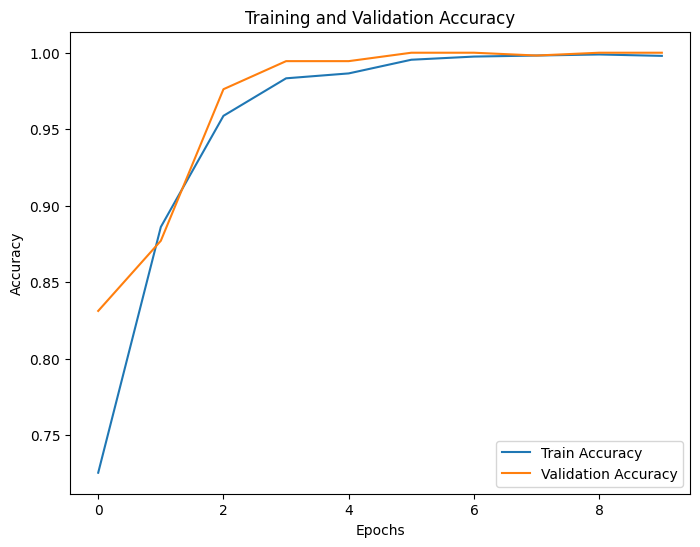

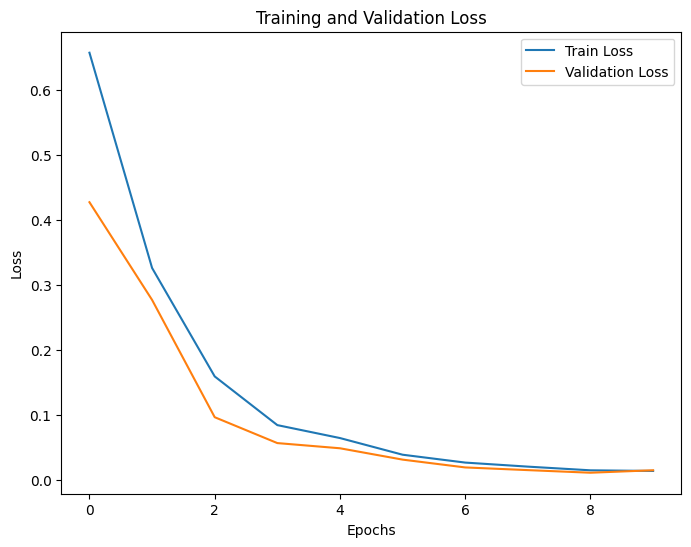

In [12]:
# Plotting training history

# Accuracy plot
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Loss plot
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def plot_confusion_matrix_heatmap(test_generator, model, class_labels):
    # Get true labels and predicted labels
    true_labels = []
    predicted_labels = []

    # Loop through the entire test set
    for i in range(len(test_generator)):
        # Get a batch of images and labels
        images, labels = test_generator[i]

        # Predict using the model
        predictions = model.predict(images)

        # For multi-class classification, use np.argmax to get the predicted class
        predicted_class = np.argmax(predictions, axis=-1)
        true_class = np.argmax(labels, axis=-1)

        # Append the true and predicted labels
        true_labels.extend(true_class)
        predicted_labels.extend(predicted_class)
    
    # Generate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

    return cm


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


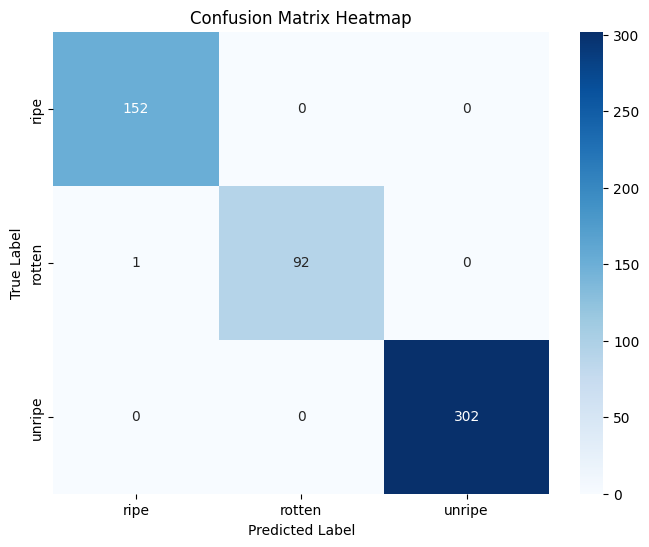

In [15]:
# Assuming 'model' is your trained CNN model and 'test_generator' is your test data generator
class_labels = list(test_generator.class_indices.keys())

# Plot the confusion matrix heatmap
confusion_matrix = plot_confusion_matrix_heatmap(test_generator, model, class_labels)


In [17]:
def plot_and_predict_random_image(test_generator, model, class_labels):
    # Get a batch of images and labels from the test set
    batch = next(test_generator)
    images, labels = batch[0], batch[1]

    # Pick a random index from the batch
    random_index = np.random.randint(0, len(images))
    random_image = images[random_index]
    random_label = labels[random_index]
    
    # Make a prediction for the random image
    prediction = model.predict(np.expand_dims(random_image, axis=0))
    
    # For multi-class classification, use np.argmax to get the predicted class
    predicted_label = np.argmax(prediction, axis=-1).item()
    
    # Get the true label from one-hot encoded label
    actual_label = np.argmax(random_label).item()
    
    # Map the predicted and actual label to the class name
    actual_class = class_labels[actual_label]
    predicted_class = class_labels[predicted_label]

    # Plot the image and predictions
    plt.imshow(random_image)
    plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

    return actual_class, predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


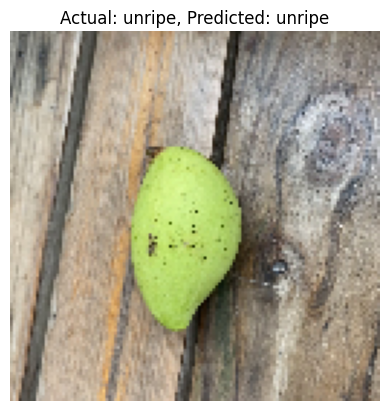

Actual class: unripe, Predicted class: unripe


In [18]:
actual, predicted = plot_and_predict_random_image(test_generator, model, class_labels)

print(f"Actual class: {actual}, Predicted class: {predicted}")
